In [1]:
import scipy 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Видимо, нам хочется сначала посмотреть, как вообще эмпирическая функция распределения ведёт себя относительно честной. Для этого раскидаем несколько наборов случайных чисел с равномерным распределением на [0, 1] и построим по ним эмпирическую функцию распределения.

In [2]:
n=100
arr = []
for i in range(0,6):
    arr.append(np.random.uniform(low=0.0, high=1.0, size=n* (2** i)))
    


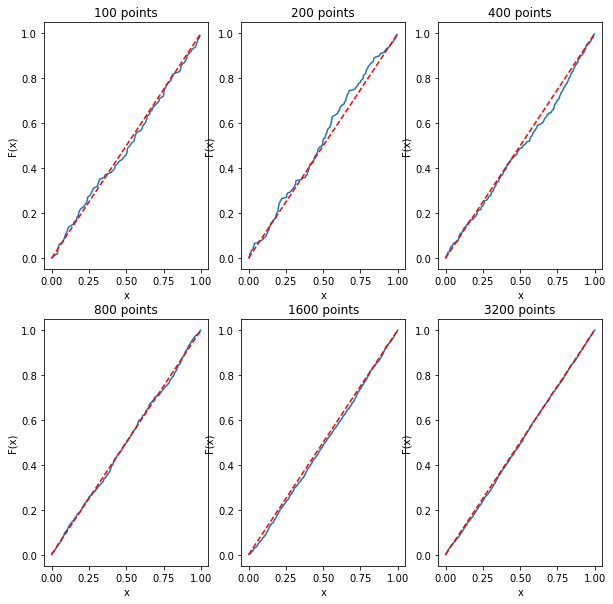

In [3]:
F_true = np.linspace(0, 1, 25)
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
sorted_list= []
distrib_list= []
for i, a in enumerate(arr):
    sorted_list.append(np.sort(arr[i]))
    distrib_list.append(np.arange(len(sorted_list[i]))/float(len(sorted_list[i])))

figure, axis = plt.subplots(2, 3, figsize=(10, 10))

axis[0, 0].plot(sorted_list[0], distrib_list[0])
axis[0, 0].plot(F_true, F_true, "r--")
axis[0, 0].set_title(str(len(sorted_list[0]))+" points")
axis[0, 0].set_xlabel("x")
axis[0, 0].set_ylabel("F(x)")

axis[0, 1].plot(sorted_list[1], distrib_list[1])
axis[0, 1].plot(F_true, F_true, "r--")
axis[0, 1].set_title(str(len(sorted_list[1]))+" points")
axis[0, 1].set_xlabel("x")
axis[0, 1].set_ylabel("F(x)")

axis[0, 2].plot(sorted_list[2], distrib_list[2])
axis[0, 2].plot(F_true, F_true, "r--")
axis[0, 2].set_title(str(len(sorted_list[2]))+" points")
axis[0, 2].set_xlabel("x")
axis[0, 2].set_ylabel("F(x)")

axis[1, 0].plot(sorted_list[3], distrib_list[3])
axis[1, 0].plot(F_true, F_true, "r--")
axis[1, 0].set_title(str(len(sorted_list[3]))+" points")
axis[1, 0].set_xlabel("x")
axis[1, 0].set_ylabel("F(x)")

axis[1, 1].plot(sorted_list[4], distrib_list[4])
axis[1, 1].plot(F_true, F_true, "r--")
axis[1, 1].set_title(str(len(sorted_list[4]))+" points")
axis[1, 1].set_xlabel("x")
axis[1, 1].set_ylabel("F(x)")

axis[1, 2].plot(sorted_list[5], distrib_list[5])
axis[1, 2].plot(F_true, F_true, "r--")
axis[1, 2].set_title(str(len(sorted_list[5]))+" points")
axis[1, 2].set_xlabel("x")
axis[1, 2].set_ylabel("F(x)")

plt.show()

Глазом можно заметить, что эмпирическая ФР приближается к реальной. Попробуем формализовать наш вывод, сделанный на глаз. Теорема Гливенко-Кантелли гласит: $sup_x|F(x) - F_n(x)| \to 0, n\to \infty$. В задании предлагается проверить сходимость по вероятности, то есть $P(sup_x|F(x) - F_n(x)|>\varepsilon) \to 0, n\to \infty$. Тогда предлагается провести следующую процедуру: зафиксировать достаточно маленький $\varepsilon$ (можно прогнать его по малости :)), провести серию бросков наборов случайных чисел (выборок) с, например, равномерным распределением, в каждом наборе посчитать $sup_x|F(x) - F_n(x)|$, посчитать вероятность выхода за пределы $\varepsilon$ по серии и в идеале увидеть, что с ростом n вероятность идёт к 0.

In [4]:
#достаточно маленький epsilon
epsilon = 0.01
#число чисел в выборке
n = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 35000, 50000]
#число итераций для одной "мощности" выборки
n_steps = 5000

In [5]:
#заводим "массив" для вероятностей
P_n = []
#для каждой мощности выборки
for i,a in enumerate(n):
    sup_exceed_counter = 0
    #генерируем выборку n_steps раз
    for j in range(n_steps):
        arr = np.random.uniform(low=0.0, high=1.0, size = a)
        # для каждой выборки считаем эмпирическую функцию распределения и sup_x|F(x) - F_n(x)| по ней
        x = np.sort(arr)
        y = np.arange(a)/float(a)
        sup=np.max(np.absolute(y-x))
        if sup > epsilon:
            sup_exceed_counter+=1
    print("now n =", a, ", вероятность sup вывалиться за eps:", sup_exceed_counter/n_steps)
    P_n.append(sup_exceed_counter/n_steps)
    

now n = 50 , вероятность sup вывалиться за eps: 1.0
now n = 100 , вероятность sup вывалиться за eps: 1.0
now n = 200 , вероятность sup вывалиться за eps: 1.0
now n = 500 , вероятность sup вывалиться за eps: 1.0
now n = 1000 , вероятность sup вывалиться за eps: 1.0
now n = 2000 , вероятность sup вывалиться за eps: 0.9848
now n = 5000 , вероятность sup вывалиться за eps: 0.6892
now n = 10000 , вероятность sup вывалиться за eps: 0.2702
now n = 20000 , вероятность sup вывалиться за eps: 0.0326
now n = 35000 , вероятность sup вывалиться за eps: 0.0018
now n = 50000 , вероятность sup вывалиться за eps: 0.0


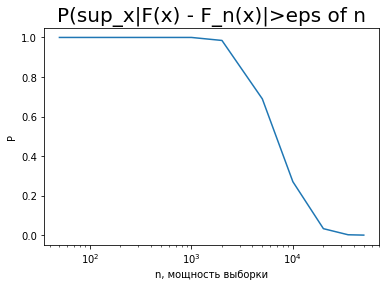

In [6]:
plt.xscale("log")
plt.plot(n, P_n)
plt.title("P(sup_x|F(x) - F_n(x)|>eps of n", fontsize=20)
plt.ylabel("P")
plt.xlabel("n, мощность выборки")
plt.show()